<h1>CREAZIONE SERIE STORICHE DECESSI TOTALI DELLE NAZIONI EUROPEE

In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

df = pd.read_csv('csv/decessi_eu_week.csv')
df.head()

,TIME,GEO,SEX,UNIT,Value
0,2010W01,Belgium,Total,Number,"2,280"
1,2010W01,Bulgaria,Total,Number,"2,262"
2,2010W01,Czechia,Total,Number,"2,155"
3,2010W01,Denmark,Total,Number,"1,159"
4,2010W01,Germany (until 1990 former territory of the FRG),Total,Number,:


In [2]:
df.drop(['SEX', 'UNIT'], axis=1, inplace=True)
df.head()

,TIME,GEO,Value
0,2010W01,Belgium,"2,280"
1,2010W01,Bulgaria,"2,262"
2,2010W01,Czechia,"2,155"
3,2010W01,Denmark,"1,159"
4,2010W01,Germany (until 1990 former territory of the FRG),:


In [3]:
df['Value'] = df['Value'].str.replace(',', '')
df.replace({":": 0}, inplace=True)
df.head()

,TIME,GEO,Value
0,2010W01,Belgium,2280
1,2010W01,Bulgaria,2262
2,2010W01,Czechia,2155
3,2010W01,Denmark,1159
4,2010W01,Germany (until 1990 former territory of the FRG),0


Modifica formato del campo <b>TIME</b> e <b>Value</b>

In [4]:
df['TIME'] = pd.to_datetime(df['TIME'] + '-1', format='%YW%W-%w')
df['Value'] = pd.to_numeric(df['Value'])
df.head()

,TIME,GEO,Value
0,2010-01-04,Belgium,2280
1,2010-01-04,Bulgaria,2262
2,2010-01-04,Czechia,2155
3,2010-01-04,Denmark,1159
4,2010-01-04,Germany (until 1990 former territory of the FRG),0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21016 entries, 0 to 21015
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TIME    21016 non-null  datetime64[ns]
 1   GEO     21016 non-null  object        
 2   Value   21016 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 492.7+ KB


<h3>Creazione delle serie storiche settimanali dei decessi totali avvenuti nelle nazioni europee da gennaio 2015 ad settembre 2020 compreso </h3>

<h1>FRANCIA

In [6]:
df_fr = df[df['GEO'] == 'France']
df_fr.head()

,TIME,GEO,Value
8,2010-01-04,France,0
45,2010-01-11,France,0
82,2010-01-18,France,0
119,2010-01-25,France,0
156,2010-02-01,France,0


In [7]:
df_fr = df_fr[df_fr['TIME'] > '2014-12-31']
df_fr = df_fr[df_fr['TIME'] < '2020-10-01']
df_fr.head()

,TIME,GEO,Value
9628,2015-01-05,France,12986
9665,2015-01-12,France,13364
9702,2015-01-19,France,13006
9739,2015-01-26,France,12830
9776,2015-02-02,France,13497


In [8]:
df_fr = df_fr.set_index('TIME')
df_fr.head()
ts_fr = df_fr.Value
ts_fr

TIME
2015-01-05    12986
2015-01-12    13364
2015-01-19    13006
2015-01-26    12830
2015-02-02    13497
              ...  
2020-08-31    10785
2020-09-07    10883
2020-09-14    11470
2020-09-21    12088
2020-09-28    11114
Name: Value, Length: 300, dtype: int64

In [9]:
df_fr.to_csv('csv/nazioni/serie_storica_fr.csv')

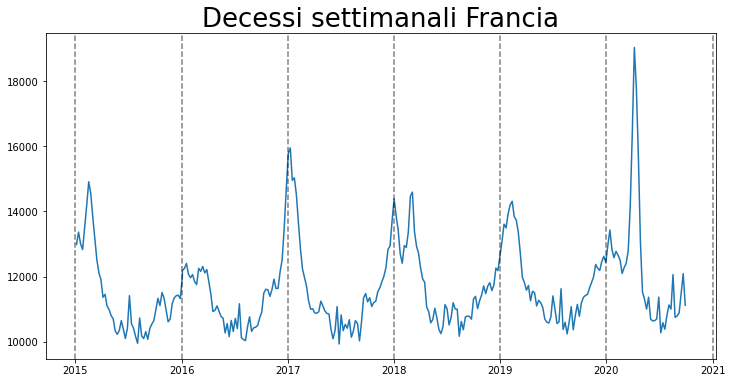

In [21]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,9,30)
lim_ts = ts_fr[start_date:end_date]

plt.figure(figsize=(12,6))
plt.title('Decessi settimanali Francia', size=26)
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)

<h1>BELGIO

In [22]:
df_be = df[df['GEO'] == 'Belgium']
df_be.head()

,TIME,GEO,Value
0,2010-01-04,Belgium,2280
37,2010-01-11,Belgium,2352
74,2010-01-18,Belgium,2303
111,2010-01-25,Belgium,2226
148,2010-02-01,Belgium,2248


In [23]:
df_be = df_be[df_be['TIME'] > '2014-12-31']
df_be = df_be[df_be['TIME'] < '2020-10-01']
df_be.head()

,TIME,GEO,Value
9620,2015-01-05,Belgium,2461
9657,2015-01-12,Belgium,2525
9694,2015-01-19,Belgium,2526
9731,2015-01-26,Belgium,2510
9768,2015-02-02,Belgium,2644


In [24]:
df_be = df_be.set_index('TIME')
df_be.head()
ts_be = df_be.Value
ts_be

TIME
2015-01-05    2461
2015-01-12    2525
2015-01-19    2526
2015-01-26    2510
2015-02-02    2644
              ... 
2020-08-31    1864
2020-09-07    1878
2020-09-14    1807
2020-09-21    1985
2020-09-28    1896
Name: Value, Length: 300, dtype: int64

In [25]:
df_be.to_csv('csv/nazioni/serie_storica_be.csv')

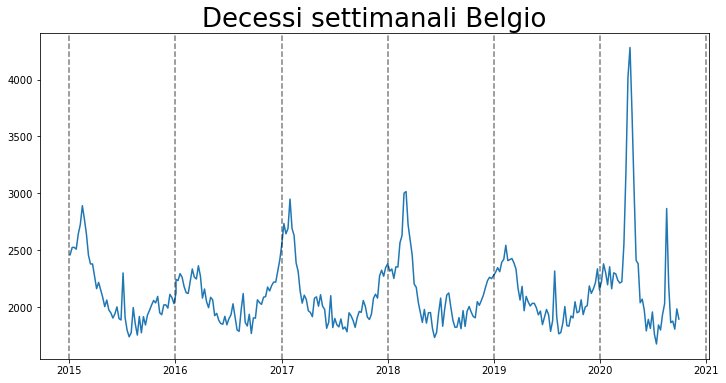

In [26]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,9,30)
lim_ts = ts_be[start_date:end_date]

plt.figure(figsize=(12,6))
plt.title('Decessi settimanali Belgio', size=26)
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)

<h1>GERMANIA

In [27]:
df_ge = df[df['GEO'] == 'Germany (until 1990 former territory of the FRG)']
df_ge.replace({"Germany (until 1990 former territory of the FRG)": 'Germany'}, inplace=True)
df_ge.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,TIME,GEO,Value
4,2010-01-04,Germany,0
41,2010-01-11,Germany,0
78,2010-01-18,Germany,0
115,2010-01-25,Germany,0
152,2010-02-01,Germany,0


In [28]:
df_ge = df_ge[df_ge['TIME'] > '2016-01-10']
df_ge = df_ge[df_ge['TIME'] < '2020-10-01']
df_ge.head()

,TIME,GEO,Value
11622,2016-01-11,Germany,18439
11659,2016-01-18,Germany,18627
11696,2016-01-25,Germany,18707
11733,2016-02-01,Germany,18493
11770,2016-02-08,Germany,18541


In [29]:
df_ge=df_ge.set_index('TIME')
df_ge.head()
ts_ge = df_ge.Value
ts_ge

TIME
2016-01-11    18439
2016-01-18    18627
2016-01-25    18707
2016-02-01    18493
2016-02-08    18541
              ...  
2020-08-31    16561
2020-09-07    16639
2020-09-14    16988
2020-09-21    17410
2020-09-28    17254
Name: Value, Length: 246, dtype: int64

In [30]:
df_ge.to_csv('csv/nazioni/serie_storica_ge.csv')

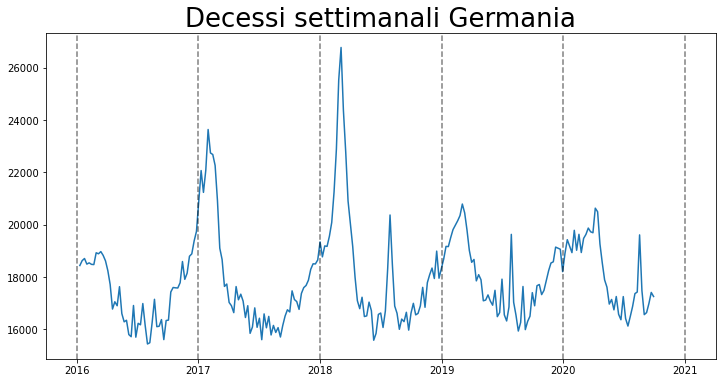

In [32]:
start_date = datetime(2016,1,1)
end_date = datetime(2020,9,30)
lim_ts = ts_ge[start_date:end_date]

plt.figure(figsize=(12,6))
plt.title('Decessi settimanali Germania', size=26)
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)

<h1>SPAGNA

In [33]:
df_sp = df[df['GEO'] == 'Spain']
df_sp.head()

,TIME,GEO,Value
7,2010-01-04,Spain,8205
44,2010-01-11,Spain,8640
81,2010-01-18,Spain,8322
118,2010-01-25,Spain,8063
155,2010-02-01,Spain,8154


In [34]:
df_sp = df_sp[df_sp['TIME'] > '2014-12-31']
df_sp = df_sp[df_sp['TIME'] < '2020-10-01']
df_sp.head()

,TIME,GEO,Value
9627,2015-01-05,Spain,9605
9664,2015-01-12,Spain,10415
9701,2015-01-19,Spain,10738
9738,2015-01-26,Spain,10625
9775,2015-02-02,Spain,11046


In [35]:
df_sp = df_sp.set_index('TIME')
df_sp.head()
ts_sp = df_sp.Value
ts_sp

TIME
2015-01-05     9605
2015-01-12    10415
2015-01-19    10738
2015-01-26    10625
2015-02-02    11046
              ...  
2020-08-31     8051
2020-09-07     7896
2020-09-14     8168
2020-09-21     8322
2020-09-28     8275
Name: Value, Length: 300, dtype: int64

In [36]:
df_sp.to_csv('csv/nazioni/serie_storica_sp.csv')

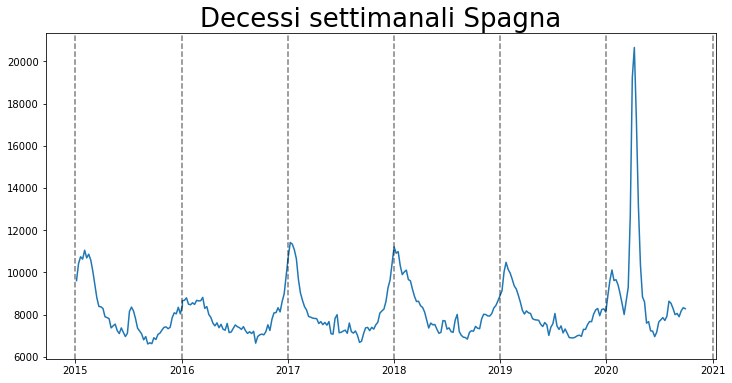

In [37]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,9,30)
lim_ts = ts_sp[start_date:end_date]

plt.figure(figsize=(12,6))
plt.title('Decessi settimanali Spagna', size=26)
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)

<h1>REGNO UNITO

In [38]:
df_uk = df[df['GEO'] == 'United Kingdom']
df_uk.head()

,TIME,GEO,Value
26,2010-01-04,United Kingdom,0
63,2010-01-11,United Kingdom,0
100,2010-01-18,United Kingdom,0
137,2010-01-25,United Kingdom,0
174,2010-02-01,United Kingdom,0


In [39]:
df_uk = df_uk[df_uk['TIME'] > '2015-01-04']
df_uk = df_uk[df_uk['TIME'] < '2020-10-01']
df_uk.head()

,TIME,GEO,Value
9646,2015-01-05,United Kingdom,13463
9683,2015-01-12,United Kingdom,18270
9720,2015-01-19,United Kingdom,16703
9757,2015-01-26,United Kingdom,15688
9794,2015-02-02,United Kingdom,14536


In [40]:
df_uk=df_uk.set_index('TIME')
df_uk.head()
ts_uk = df_uk.Value
ts_uk

TIME
2015-01-05    13463
2015-01-12    18270
2015-01-19    16703
2015-01-26    15688
2015-02-02    14536
              ...  
2020-08-31    10352
2020-09-07     9005
2020-09-14    11158
2020-09-21    10784
2020-09-28    10861
Name: Value, Length: 300, dtype: int64

In [41]:
df_uk.to_csv('csv/nazioni/serie_storica_uk.csv')

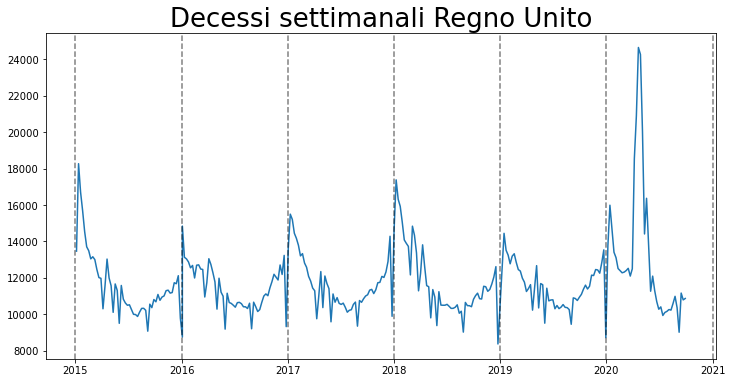

In [42]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,9,30)
lim_ts = ts_uk[start_date:end_date]

plt.figure(figsize=(12,6))
plt.title('Decessi settimanali Regno Unito', size=26)
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)

<h1>PORTOGALLO

In [43]:
df_pt = df[df['GEO'] == 'Portugal']
df_pt.head()

,TIME,GEO,Value
20,2010-01-04,Portugal,2345
57,2010-01-11,Portugal,2569
94,2010-01-18,Portugal,2225
131,2010-01-25,Portugal,2255
168,2010-02-01,Portugal,2277


In [44]:
df_pt = df_pt[df_pt['TIME'] > '2015-01-01']
df_pt = df_pt[df_pt['TIME'] < '2020-10-01']
df_pt.head()

,TIME,GEO,Value
9640,2015-01-05,Portugal,2813
9677,2015-01-12,Portugal,3054
9714,2015-01-19,Portugal,3167
9751,2015-01-26,Portugal,3088
9788,2015-02-02,Portugal,2909


In [45]:
df_pt = df_pt.set_index('TIME')
df_pt.head()
ts_pt = df_pt.Value
ts_pt

TIME
2015-01-05    2813
2015-01-12    3054
2015-01-19    3167
2015-01-26    3088
2015-02-02    2909
              ... 
2020-08-31    2060
2020-09-07    2047
2020-09-14    2216
2020-09-21    2107
2020-09-28    1875
Name: Value, Length: 300, dtype: int64

In [46]:
df_pt.to_csv('csv/nazioni/serie_storica_pt.csv')

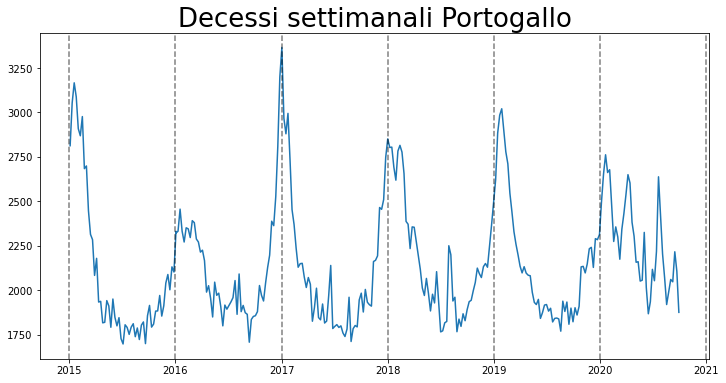

In [47]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,9,30)
lim_ts = ts_pt[start_date:end_date]

plt.figure(figsize=(12,6))
plt.title('Decessi settimanali Portogallo', size=26)
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)

<h1>GRECIA

In [55]:
df_gr = df[df['GEO'] == 'Greece']
df_gr.head()

,TIME,GEO,Value
6,2010-01-04,Greece,0
43,2010-01-11,Greece,0
80,2010-01-18,Greece,0
117,2010-01-25,Greece,0
154,2010-02-01,Greece,0


In [56]:
df_gr = df_gr[df_gr['TIME'] > '2015-01-04']
df_gr = df_gr[df_gr['TIME'] < '2020-09-01']
df_gr.head()

,TIME,GEO,Value
9626,2015-01-05,Greece,2645
9663,2015-01-12,Greece,3013
9700,2015-01-19,Greece,3053
9737,2015-01-26,Greece,3065
9774,2015-02-02,Greece,2778


In [57]:
df_gr = df_gr.set_index('TIME')
df_gr.head()
ts_gr = df_gr.Value
ts_gr

TIME
2015-01-05    2645
2015-01-12    3013
2015-01-19    3053
2015-01-26    3065
2015-02-02    2778
              ... 
2020-08-03    2714
2020-08-10    2529
2020-08-17    2367
2020-08-24    2359
2020-08-31    2300
Name: Value, Length: 296, dtype: int64

In [58]:
df_gr.to_csv('csv/nazioni/serie_storica_gr.csv')

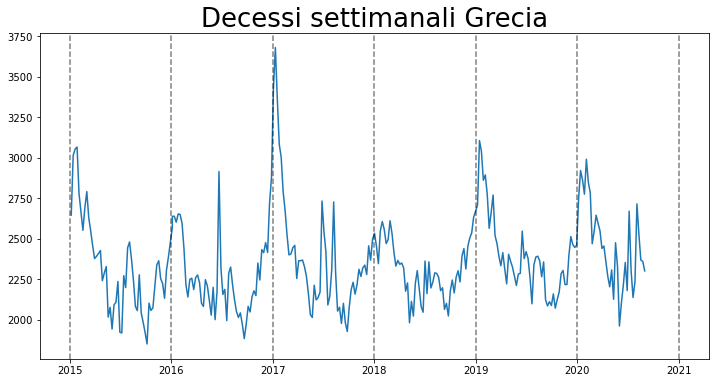

In [60]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,8,31)
lim_ts = ts_gr[start_date:end_date]

plt.figure(figsize=(12,6))
plt.title('Decessi settimanali Grecia', size=26)
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)

<h1>ROMANIA

In [61]:
df_ro = df[df['GEO'] == 'Romania']
df_ro.head()

,TIME,GEO,Value
21,2010-01-04,Romania,0
58,2010-01-11,Romania,0
95,2010-01-18,Romania,0
132,2010-01-25,Romania,0
169,2010-02-01,Romania,0


In [62]:
df_ro = df_ro[df_ro['TIME'] > '2015-01-04']
df_ro = df_ro[df_ro['TIME'] < '2020-10-01']
df_ro.head()

,TIME,GEO,Value
9641,2015-01-05,Romania,5803
9678,2015-01-12,Romania,5848
9715,2015-01-19,Romania,5602
9752,2015-01-26,Romania,5508
9789,2015-02-02,Romania,5560


In [63]:
df_ro = df_ro.set_index('TIME')
df_ro.head()
ts_ro = df_ro.Value
ts_ro

TIME
2015-01-05    5803
2015-01-12    5848
2015-01-19    5602
2015-01-26    5508
2015-02-02    5560
              ... 
2020-08-31    5156
2020-09-07    4964
2020-09-14    4885
2020-09-21    4942
2020-09-28    4891
Name: Value, Length: 300, dtype: int64

In [64]:
df_ro.to_csv('csv/nazioni/serie_storica_ro.csv')

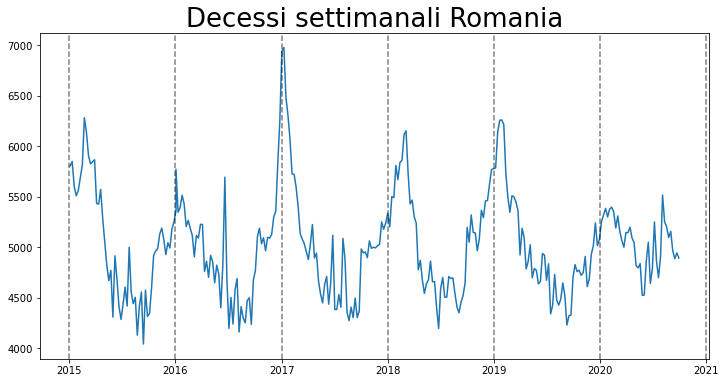

In [65]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,9,30)
lim_ts = ts_ro[start_date:end_date]

plt.figure(figsize=(12,6))
plt.title('Decessi settimanali Romania', size=26)
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)